(content:f0)=
# Fundamental frequency (F0)
## Introduction

The fundamental frequency of a speech signal, often denoted by F0 or
$F_{0}$, refers to the approximate frequency of the
(quasi-)periodic structure of voiced speech signals. The oscillation
originates from the vocal folds, which oscillate in the airflow when
appropriately tensed. The fundamental frequency is defined as the
average number of oscillations per second and expressed in Hertz. Since
the oscillation originates from an organic structure, it is not exactly
periodic but contains significant fluctuations. In particular, amount of
variation in period length and amplitude are known respectively as
*jitter* and *shimmer*. Moreover, the F0 is typically not stationary,
but changes constantly within a sentence. In fact, the F0 can be used
for expressive purposes to signify, for example, emphasis and questions.

Typically fundamental frequencies lie roughly in the range *80* to *450
Hz*, where males have lower voices than females and children. The F0 of
an individual speaker depends primarily on the length of the vocal
folds, which is in turn correlated with overall body size. Cultural and
stylistic aspects of speech naturally have also a large impact.

The fundamental frequency is closely related to *pitch*, which is
defined as our perception of fundamental frequency. That is, the F0
describes the actual physical phenomenon, whereas pitch describes how
our ears and brains interpret the signal, in terms of periodicity. For
example, a voice signal could have an F0 of 100 Hz. If we then apply a
high-pass filter to remove all signal components below 450 Hz, then that
would remove the actual fundamental frequency. The lowest remaining
periodic component would be 500 Hz, which correspond to the fifth
harmonic of the original F0. However, a human listener would then
typically still perceive a pitch of 100 Hz, even if it does not exist
anymore. The brain somehow reconstructs the fundamental from the upper
harmonics. This well-known phenomenon is however still not completely
understood. 


A speech signal with a fundamental frequency of approximately F0=93Hz.

![aaa](attachments/175515681.png)

The spectrum of a speech signal with a fundamental frequency of
approximately F0=93Hz (original) and a high-pass filtered version of it
such that the fundamental frequency has been removed (high-pass
filtered).


![highpass](attachments/175515679.png)

A speech signal with a fundamental frequency of approximately F0=93Hz

In [1]:
import IPython.display as ipd
ipd.Audio('attachments/175515683.wav')

A high-pass
filtered version of it such that the fundamental frequency has been
removed

In [2]:
import IPython.display as ipd
ipd.Audio('attachments/175515684.wav')



If $F_{0}$ is the fundamental frequency, then the length of a
single period in seconds is

$$ T=\frac{1}{F_0}. $$

The speech waveform thus repeats itself after every $T$ seconds.

A simple way of modelling the fundamental frequency is to repeat the
signal after a delay of $T$ seconds. If a signal is sampled with a
sampling rate of $F_{s}$, then the signal repeats after a delay
of $L$ samples where

$$ L = F_s T = \frac{F_s}{F_0}. $$

A signal $x_{n}$ then approximately repeats itself such that

$$ x_n \approx x_{n-L} \approx x_{n-2L} \approx x_{n-3L}. $$

In the Z-domain this can be modelled by an IIR-filter as

$$ B(z) = 1 - \gamma_L z^{-L}, $$

where the scalar $ 0\leq\gamma_L\leq 1 $ scales with the accuracy
of the period. The Z-transform of the signal $x_{n}$ can then be
written as $ X(z)=B^{-1}(z) E(z), $ where $E(z)$ is the Z-transform
of a single period.

Segment of a speech signal, with the period length $L$, and fundamental
frequency $F_0=1/L$.
![f0_L](attachments/149891410.png)

Spectrum of speech signal with the fundamental frequency $F_{0}$
and harmonics $kF_{0}$, as well as the
formants *F1*, *F2*, *F3*... Notice how the harmonics form a regular
comb-structure.

![f0_formants](attachments/175515678.png)

  

The magnitude spectrum of $B^{-1}(z)$, has then a periodic
comb-structure. That is, the magnitude spectrum has peaks at $ k\,F_0
$ , for integer $k$.
For a discussion about the fundamental frequency in the cepstral
domain, see [Cepstrum and MFCC](content:mfcc).


Spectrum of fundamental frequency model $B^{-1}(z)$, showing the
characteristic comb-structure with harmonic peaks appearing at integer
multiples of $F0$.

![comb](attachments/149891452.png)

(content:f0estimation)=
## Fundamental frequency estimation

The [fundamental frequency (F0)](content:f0) is central
in describing speech signals whereby we need methods for estimating the
$F_0$ from speech signals. In speech analysis applications, it can be
informative to study the absolute value of the fundamental frequency as
such, but more commonly, extraction of the $F_0$ is usually a
pre-processing step. For example, in [recognition
tasks](content:recotasks), $F_0$ is often used as a
feature for machine learning methods. A voice activity detector could,
for instance, set a lower and higher threshold on the $F_0$, such that
sounds with an $F_0$ outside the valid range would be classified as
non-speech.

The fundamental frequency is visible in multiple different domains:

-   In an acoustic time signal, the $F_0$ is visible as a repetition after
    every $T$ samples.
-   In the [autocovariance or
    -correlation](content:xcorr), the $F_0$ is visible
    as a peak at lag $T$ as well as its integer multiples $kT$.
-   In the magnitude, power or log-magnitude
    [spectrum](stft), the $F_0$ is visible as a peak at
    the frequency $F_0=F_{s}/T$, as well as its integer
    multiples, where $F_{s}$ is the sampling frequency.
-   In the [cepstrum](content:mfcc), the $F_0$ is visible as a peak at
    quefrency $T$ as well as its integer multiples $kT$.

Consequently, we can use any of these domains to estimate the
fundamental frequency $F_0$. A typical approach applicable in all domains
except the time domain is peak-picking. The fundamental frequency
corresponds to a peak in each domain, such that we can determine the $F_0$
by finding the highest peak. For better robustness to spurious peaks and
computational efficiency, we naturally limit our search to the range
of valid $F_0$'s, such as  $ 80\leq F_0\leq 450. $  

The harmonic structure, however, poses a problem for peak-picking. Peaks
appear at integer multiples of either $F_0$ or lag T, such that sometimes,
by coincidence or due to estimation errors, the harmonic peaks can be
higher than the primary peak. Such estimation errors are known
as *octave errors* because the error in $F_0$ corresponds to the musical
interval of an octave. A typical post-processing step is, therefore, to
check for octave jumps. We can check whether $F_0/2$ or $F_0/3$ 
correspond to a sensible $F_0$. Alternatively, we can check whether the
previous analysis frame had an $F_0$, an octave, or two octaves off.
Depending on the application, we can then fix errors or label problematic
zones for later use.

Another problem with peak picking is that peak locations might not align
with the samples. For example, in the autocorrelation domain, the actual
length of the period could be 100.3 samples. However, the peak in the
autocorrelation would then appear at lag 100. One approach would then be
to use quadratic interpolation between samples near a peak
and use the location of the maximum of the interpolated peak to estimate the peak location. Interpolation makes the estimate less
sensitive to noise. For example, background noise could 
peak at lag 102, so the desired maximum of 100 is lower than the peak
at 102. By using data from more samples, as in the interpolation
approach, we can, therefore, reduce the likelihood that a single corrupted
data point would cause an error.

An alternative approach to peak-picking is to use all distinctive peaks
to estimate the $F_0$ jointly. That is, if you find $N$ peaks at
frequencies $p_{k}$, which approximately correspond to harmonic
peaks $kF0$, then you can approximate $ F_0 \approx \frac1N
\sum_{k=1}^N p_k/k. $ Another alternative is to calculate the
distance between consecutive peaks and estimate $ F_0 \approx
\frac1{N-1} \sum_{k=1}^{N-1} (p_{k+1}-p_k). $ We can also combine
these methods as we like.

A further potential improvement is to compare subsequent frames. The pitch in speech is fairly continuous over time, and subsequent frames should, therefore, have similar F0s. This can be used to reduce the danger of octave jumps.

In many other applications, we use discrete Fourier transform (DFT) or
cosine transforms (DCT) to resolve frequency components. It would, therefore, be tempting to apply the same approach here. In such a
domain, we would also already have a joint estimate which does not rely on single data points. However, note that the spectrum is already the DFT of the time signal, and the cepstrum is the DCT or DFT of the log-spectrum. Additional transforms, therefore, usually do not resolve the ambiguity between harmonics. 

A classic algorithm for fundamental frequency estimation is YIN {cite}`deCheveigne2002yin`, which has been later improved with a probabilistic version pYIN {cite}`mauch2014pyin`. YIN is based on peak picking in the autocorrelation domain while emphasizing continuity over time.

## Examples

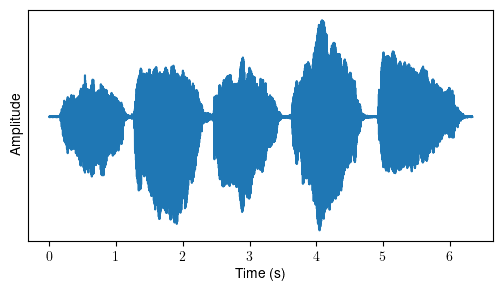

In [3]:
# Initialization
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy
import scipy.fft
import numpy as np
import IPython

filename = 'sounds/f0sample.wav'

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

# read from storage
fs, data = wavfile.read(filename)
data = data[:,0]
time = np.arange(len(data))/fs

IPython.display.display(IPython.display.Audio(data,rate=fs))
plt.figure(figsize=(6,3))
plt.plot(time,data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.yticks([])
plt.show()

Excerpts of each tone (columns) with a square (upper row) and a Hann window (lower row).

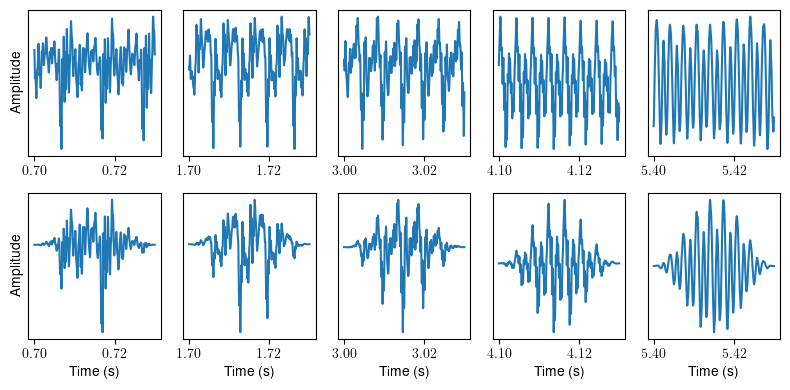

In [4]:
window_length_ms = 30

window_length = int(window_length_ms*fs/1000)
window_time = np.arange(window_length)
windowing_function = np.sin(np.pi*np.arange(0.5,window_length,1)/window_length)**2


time_sec_list = [0.7, 1.7, 3, 4.1, 5.4]
plt.figure(figsize=(8,4))

for k in range(5):
    time_ix = int(time_sec_list[k]*fs) + window_time
    plt.subplot(251+k)
    plt.plot(time_ix/fs, data[time_ix])
    if k==0: plt.ylabel('Amplitude')
    plt.yticks([])
    plt.subplot(2,5,6+k)
    plt.plot(time_ix/fs, data[time_ix]*windowing_function)
    plt.xlabel('Time (s)')
    if k==0: plt.ylabel('Amplitude')
    plt.yticks([])

plt.tight_layout()

The (loosly) periodic structure is visible for each tone as a repeated waveform. Left to right, the pitch increases and the period length becomes shorter such that more periods fit the 30ms analysis window. We also note that for the lowest tone, the periods are nicely visible with the square window (upper row), but less so with the Hann window.

To estimate the fundamental frequency, recall that for a zero-mean signal $x_k$ with a period length $L$, we should have $x_k \approx x_{k-L}$ or equivalently, zero expectation $E\left[\left(x_k - x_{k-L}\right)^2\right]=0.$ For a sample segment of length $N$, the expectation has 

$$
0=E\left[\left(x_k - x_{k-L}\right)^2\right] \approx \frac1N \sum_{k=0}^{N-1} \left( x_k - x_{k-L} \right)^2 = \frac1N\left\|{\mathbf x}_k-{\mathbf x}_{k-L}\right\|^2.
$$

Here ${\mathbf x}_k$ is a vector containing the samples of $x_k$ to $x_{k+N}$. 

To find the fundamental frequency, we can then find that $L$ where the above norm is closest to zero. 

$$
\begin{split}
\hat L &
:= \arg\min_L \frac1N\left\|{\mathbf x}_k-{\mathbf x}_{k-L}\right\|^2 
= \arg\min_L \left[\left\|{\mathbf x}_k\right\|^2-2{\mathbf x}_k^T{\mathbf x}_{k-L}^T + \left\|{\mathbf x}_{k-L}\right\|^2 \right]
\\&
= \arg\max_L {\mathbf x}_k^T{\mathbf x}_{k-L}^T ,
\end{split}
$$

where constants that do not depend on $L$ were omitted, and the minimum was replaced by the maximum by changing the sign. We thus obtained the maximization of the correlation between the signal and its delayed version. Note that this makes this approach equivalent with estimating the maximum of the [autocorrelation](content:xcorr) function.

In [5]:
f0_range_Hz = np.array([80, 450])
f0_range = np.round(fs/np.flipud(f0_range_Hz)).astype(int)

print(f"Frequency range {f0_range_Hz[0]} to {f0_range_Hz[1]} Hz. "
      f"Lag range {(1000/f0_range_Hz[1]):2.2f} to {(1000/f0_range_Hz[0]):2.2f} ms or\n{f0_range[0]} to {f0_range[1]} samples with the sampling rate {fs/1000} kHz.")

correlation = np.zeros([5,window_length-1])

for k in range(5):
    time_ix = int(time_sec_list[k]*fs) + window_time
    xwin = data[time_ix]*windowing_function    
    for L in range(window_length-1):
        x_k = xwin[:window_length-L]
        x_kL = xwin[L:window_length]
        correlation[k,L] = np.sum(x_k*x_kL)/(window_length-L)

max_lag = np.argmax(correlation[:,f0_range[0]:f0_range[1]],axis=1)+f0_range[0]
        

Frequency range 80 to 450 Hz. Lag range 2.22 to 12.50 ms or
98 to 551 samples with the sampling rate 44.1 kHz.


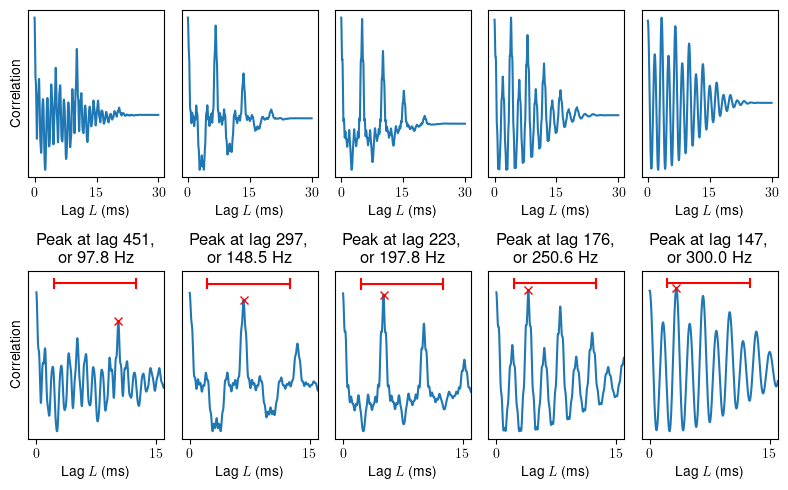

In [6]:
plt.figure(figsize=(8,5))
for k in range(5):
    plt.subplot(2,5,1+k)
    plt.plot(1000*np.arange(window_length-1)/fs, correlation[k,:])
    plt.xlabel('Lag $L$ (ms)')
    if k==0: plt.ylabel('Correlation')
    plt.yticks([])    
    plt.xticks([0, 15,30]) 

    plt.subplot(2,5,6+k)
    plt.plot(1000*np.arange(window_length-1)/fs, correlation[k,:])
    plt.plot(1000*np.array([f0_range[0], f0_range[0], f0_range[0], f0_range[1], f0_range[1], f0_range[1]])/fs,
             correlation[k,0]*np.array([1.15, 1.05, 1.1, 1.1, 1.05, 1.15]),color='red')

    plt.plot(1000*max_lag[k]/fs, correlation[k,max_lag[k]], 'rx')
    plt.title(f"Peak at lag {max_lag[k]}, \nor {fs/max_lag[k]:2.1f} Hz")
    plt.xlabel('Lag $L$ (ms)')
    if k==0: plt.ylabel('Correlation')
    plt.yticks([])
    plt.xticks([0, 15]) 
    plt.xlim([-1, 16])
    

plt.tight_layout()
plt.show()

The upper row shows the whole correlation, while the lower row zooms near the valid range of lags (indicated by the red lines). Red crosses show the maximum peak.

With this easy sound example, the maxima are easy to discern. However, with both the lowest (leftmost) and highest (rightmost) pitches, other peaks are very close in magnitude to the true pitch. As this was an easy signal, it is thus not difficult to imagine more challenging sounds where peak picking would land at the incorrect peak.

We can repeat the experiment using the [power spectrum](stft) (squared absolute spectrum).

In [7]:
fft_length = window_length
spectrum_length = (fft_length//2)+1
f0_range_fft_indices = np.round(f0_range_Hz*fft_length/fs).astype(int)

power_spectrum = np.zeros([5,spectrum_length])
for k in range(5):
    time_ix = int(time_sec_list[k]*fs) + window_time
    xwin = data[time_ix]*windowing_function    
    power_spectrum[k,:] = np.abs(scipy.fft.rfft(xwin,n=fft_length))**2

max_frequency_index = np.argmax(
    power_spectrum[:,f0_range_fft_indices[0]:f0_range_fft_indices[1]],
    axis=1) +f0_range_fft_indices[0]
max_frequency = max_frequency_index*fs/fft_length        

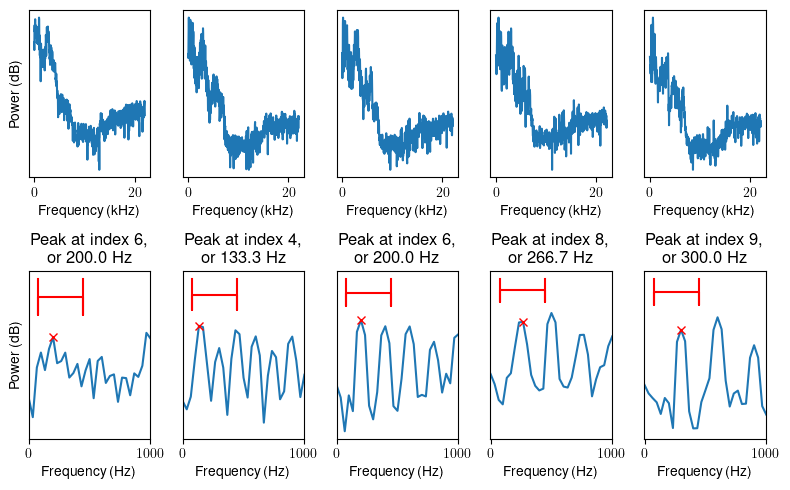

In [8]:
fft_ix = np.linspace(0,fs/2,spectrum_length)
plot_range_Hz = np.arange(0, 1200)
plot_range = np.round(plot_range_Hz*fft_length/fs).astype(int)

plt.figure(figsize=(8,5))
for k in range(5):
    plt.subplot(2,5,1+k)
    plt.plot(fft_ix/1000, 10*np.log10(power_spectrum[k,:]))
    plt.xlabel('Frequency (kHz)')
    if k==0: plt.ylabel('Power (dB)')
    plt.yticks([])    

    plt.subplot(2,5,6+k)
    plt.plot(fft_ix[plot_range], 
             10*np.log10(power_spectrum[k,plot_range]))
    plt.plot(np.array([f0_range_Hz[0], 
                            f0_range_Hz[0], 
                            f0_range_Hz[0], 
                            f0_range_Hz[1], 
                            f0_range_Hz[1], 
                            f0_range_Hz[1]]),
             10*np.log10(np.max(power_spectrum[k,:]))*np.array([1.15, 1.05, 1.1, 1.1, 1.05, 1.15]),color='red')

    plt.plot(max_frequency[k], 
             10*np.log10(power_spectrum[k,max_frequency_index[k]]), 
             'rx')
    plt.title(f"Peak at index {max_frequency_index[k]}, \nor {max_frequency[k]:2.1f} Hz")
    plt.xlabel('Frequency (Hz)')
    if k==0: plt.ylabel('Power (dB)')
    plt.yticks([])
    plt.xlim([-1, 1000])
    

plt.tight_layout()
plt.show()

Observe that the y-axis is now expressed in decibels. The upper row has the complete spectrum of each tone, while the lower row zooms in on the frequency range where the fundamental is visible. 

We immediately observe that for the lowest (leftmost) tone, the pitch is incorrectly estimated as it picks up the second peak of the harmonic structure. In fact, for the two highest pitches, the second harmonic peak is higher than the first, but it is not incorrectly picked up only because it is outside the defined frequency analysis range. Furthermore, the accuracy of estimated frequencies is low because that the density of frequencies is not sufficient. The accuracy can however be improved by oversampling the spectrum, that is, by extending the analysis window by zeros before the Fourier transform.

In other words, let us extend the vector with zeros to a length equal to the sampling rate (44100).

In [9]:
fft_length = fs
spectrum_length = (fft_length//2)+1
f0_range_fft_indices = np.round(f0_range_Hz*fft_length/fs).astype(int)

power_spectrum = np.zeros([5,spectrum_length])
for k in range(5):
    time_ix = int(time_sec_list[k]*fs) + window_time
    xwin = data[time_ix]*windowing_function    
    power_spectrum[k,:] = np.abs(scipy.fft.rfft(xwin,n=fft_length))**2

max_frequency_index = np.argmax(
    power_spectrum[:,f0_range_fft_indices[0]:f0_range_fft_indices[1]],
    axis=1) +f0_range_fft_indices[0]
max_frequency = max_frequency_index*fs/fft_length        

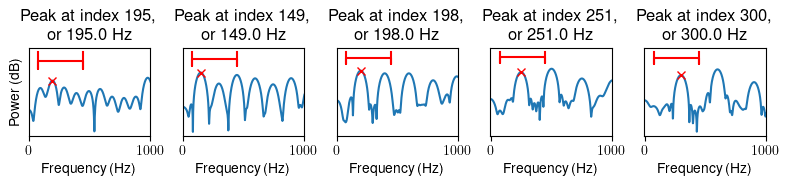

In [10]:
fft_ix = np.linspace(0,fs/2,spectrum_length)
plot_range_Hz = np.arange(0, 1200)
plot_range = np.round(plot_range_Hz*fft_length/fs).astype(int)

plt.figure(figsize=(8,3))
for k in range(5):
    plt.subplot(2,5,1+k)
    plt.plot(fft_ix[plot_range], 
             10*np.log10(power_spectrum[k,plot_range]))
    plt.plot(np.array([f0_range_Hz[0], 
                            f0_range_Hz[0], 
                            f0_range_Hz[0], 
                            f0_range_Hz[1], 
                            f0_range_Hz[1], 
                            f0_range_Hz[1]]),
             10*np.log10(np.max(power_spectrum[k,:]))*np.array([1.15, 1.05, 1.1, 1.1, 1.05, 1.15]),color='red')

    plt.plot(max_frequency[k], 
             10*np.log10(power_spectrum[k,max_frequency_index[k]]), 
             'rx')
    plt.title(f"Peak at index {max_frequency_index[k]}, \nor {max_frequency[k]:2.1f} Hz")
    plt.xlabel('Frequency (Hz)')
    if k==0: plt.ylabel('Power (dB)')
    plt.yticks([])
    plt.xlim([-1, 1000])
    

plt.tight_layout()
plt.show()

It is now much easier to determine the exact location of each peak and thus the frequency estimates are also more accurate. However, this did not solve the octave jump in the lowest (leftmost) tone, where the second harmonic is still larger than the first, true peak.

The third main feature often used for F0 estimation is the [cepstrum](content:melcepstrum).

In [11]:
fft_length = window_length
spectrum_length = (fft_length//2)+1
f0_range_fft_indices = np.round(f0_range_Hz*fft_length/fs).astype(int)

power_spectrum = np.zeros([5,spectrum_length])
for k in range(5):
    time_ix = int(time_sec_list[k]*fs) + window_time
    xwin = data[time_ix]*windowing_function    
    power_spectrum[k,:] = np.abs(scipy.fft.rfft(xwin,n=fft_length))**2

In [12]:
cepstrum = scipy.fft.irfft(10*np.log10(power_spectrum),axis=1)

max_cepstral_peak = np.argmax(cepstrum[:,f0_range[0]:f0_range[1]],axis=1)+f0_range[0]

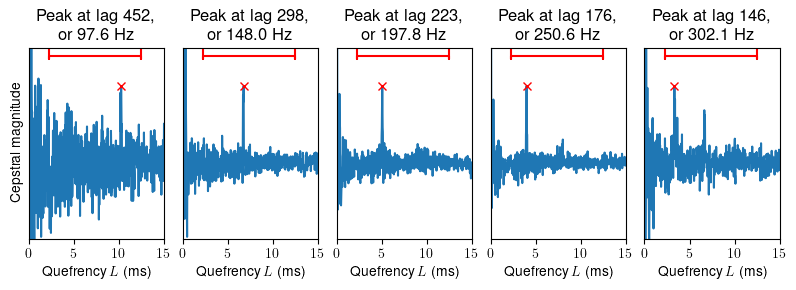

In [13]:
plt.figure(figsize=(8,3))
for k in range(5):
    plt.subplot(1,5,1+k)
    plt.plot(1000*np.arange(window_length-1)/fs, cepstrum[k,:])
    plt.plot(1000*np.array([f0_range[0], f0_range[0], f0_range[0], f0_range[1], f0_range[1], f0_range[1]])/fs,
             cepstrum[k,max_cepstral_peak[k]]*np.array([1.55, 1.35, 1.4, 1.4, 1.35, 1.55]),color='red')

    plt.plot(1000*max_cepstral_peak[k]/fs, cepstrum[k,max_cepstral_peak[k]], 'rx')
    plt.title(f"Peak at lag {max_cepstral_peak[k]}, \nor {fs/max_cepstral_peak[k]:2.1f} Hz")
    plt.xlabel('Quefrency $L$ (ms)')
    if k==0: plt.ylabel('Cepstral magnitude')
    plt.yticks([])    
    plt.xlim([0, 15]) 
    plt.ylim(cepstrum[k,max_cepstral_peak[k]]*np.array([-1,1.5]))
    

plt.tight_layout()
plt.show()

The peaks are much more pronounced here in the cepstrum in the sense that they are sharp and easily distinguishable from the noise. Still, the same danger of octave jumps persists in the lowest and highest tones, as there are other high peaks in the search range (red lines). However, since the peaks are now narrow, we cannot easily interpolate between points to find a more accurate location of the peak.

## Pitch contours and -tracking

Pitch is used in speech for expressive purposes. In particular, relatively high pitch (and intensity) segments typically indicate an emphasis. It is therefore important to observe changes in pitch over time. Such pitch-over-time plots are known as *pitch contours*. The challenge of finding "good" pitch contours, that avoids intermittent octave-jumps, is known as *pitch tracking*.

Here is a sample sentence that can be used to demonstrate pitch contours and -tracking.

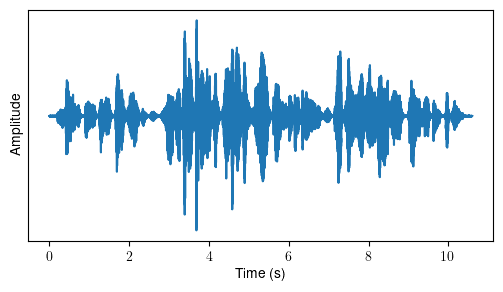

In [14]:
# Initialization
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy
import scipy.fft
import numpy as np
import IPython
import librosa

filename = 'sounds/f0speechsample.wav'

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

# read from storage
fs, data = wavfile.read(filename)
datalength = len(data)
time = np.arange(datalength)/fs

IPython.display.display(IPython.display.Audio(data,rate=fs))
plt.figure(figsize=(6,3))
plt.plot(time,data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.yticks([])
plt.show()

In [15]:
window_step = window_length // 2
window_count = (datalength - window_length)//window_step - 1

f0estimates = np.zeros([window_count, 4])

f0pyin, voiced_flag, voiced_prob = librosa.pyin(data.astype(float), 
                                    sr = fs, # sampling frequency
                                    fmin=f0_range_Hz[0], 
                                    fmax=f0_range_Hz[1], 
                                    frame_length=window_length, 
                                    hop_length=window_step)    

f0estimates[:,3] = f0pyin[1:window_count+1]

for window_ix in range(window_count):
    window = data[(window_ix*window_step):(window_ix*window_step+window_length)] * windowing_function

    correlation = np.correlate(window,window,mode='full')[window_length-1:]
    power_spectrum = np.abs(scipy.fft.rfft(window,n=fft_length))**2
    cepstrum = scipy.fft.irfft(10*np.log10(power_spectrum))

    max_corr_index = np.argmax(correlation[f0_range[0]:f0_range[1]])+f0_range[0]
    max_frequency_index = np.argmax(
        power_spectrum[f0_range_fft_indices[0]:f0_range_fft_indices[1]]) +f0_range_fft_indices[0]
    max_cepstral_index = np.argmax(cepstrum[f0_range[0]:f0_range[1]])+f0_range[0]

    f0estimates[window_ix, 0] = fs/max_corr_index
    f0estimates[window_ix, 1] = max_frequency_index*fs/fft_length        
    f0estimates[window_ix, 2] = fs/max_cepstral_index



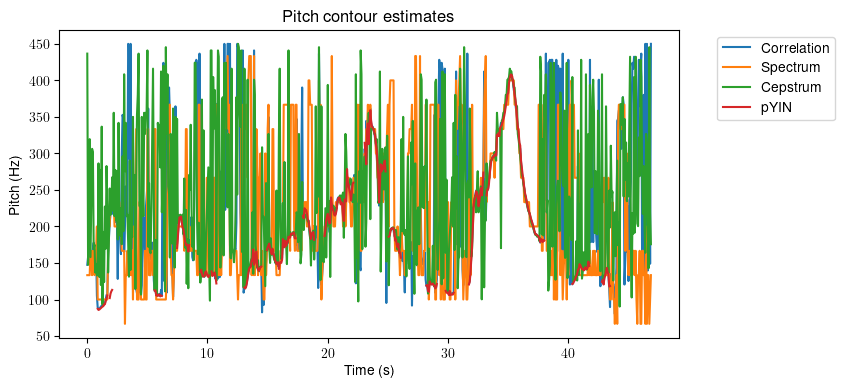

In [16]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(0,window_count)*fs/(1000*window_step),f0estimates)
plt.legend(['Correlation','Spectrum','Cepstrum','pYIN'],bbox_to_anchor=(1.05, 1.0))
plt.title('Pitch contour estimates')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.show()

The figure illustrates four different estimates of the pitch contour; the above presented three methods as well as pYIN, which is an improvement of the classic YIN method {cite}`deCheveigne2002yin, mauch2014pyin`. 

We can observe that near 35s, all four methods are nicely aligned, giving a continuous pitch contour. However, elsewhere, the three homebrew methods are very noisy. The first obvious reason is that the presented methods estimate a pitch in all frames, also when no voiced signal is present. We can use [voice activity detection](content:vad) to limit analysis to only speech frames. This still leaves unvoiced frames for which we need some additional detection. We can, for example, check whether the detected peak is "prominent" or large enough in its surroundings such that it really is a peak and not noise. Also, if the detected maximum is at the border of the analysis range, that often indicates an anomaly, e.g. the maximum is likely outside the analysis range. Such heuristics should then be carefully tuned.

The pYIN library function used here (from [Librosa](https://librosa.org/)) provides such a measure of voicing activity. By filtering the pitch contours to include only voiced frames, we obtain the following.

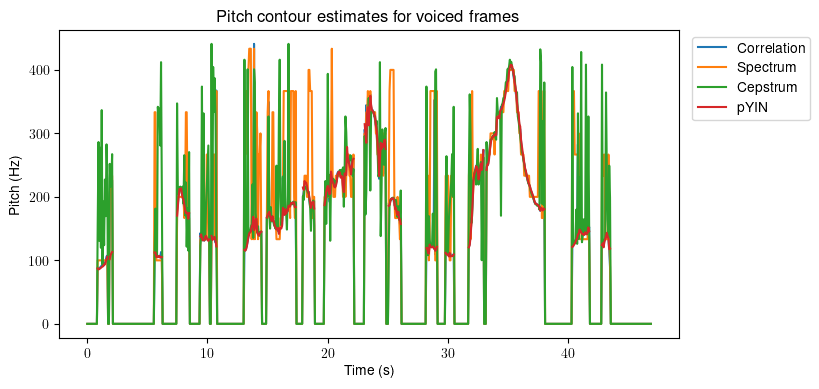

In [17]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(0,window_count)*fs/(1000*window_step),f0estimates*voiced_flag[1:window_count+1].reshape([window_count,1]).astype(int))
plt.legend(['Correlation','Spectrum','Cepstrum','pYIN'],bbox_to_anchor=(1.01, 1.0))
plt.title('Pitch contour estimates for voiced frames')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.show()

This seems vaguely better as a large portion of the noise has been omitted. A better visualization could be to compare the three first estimates with pYIN individually and with discrete points for each frame rather than a line.

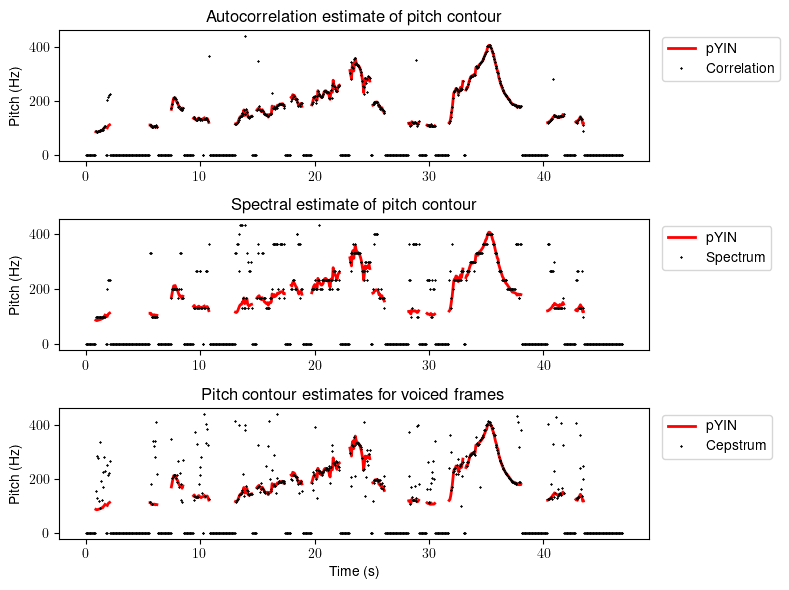

In [18]:
plt.figure(figsize=(8,6))
for k in range(3):
    plt.subplot(311+k)
    plt.plot(np.arange(0,window_count)*fs/(1000*window_step),f0estimates[:,3]*voiced_flag[1:window_count+1].astype(int),
            'r-',linewidth=2)
    plt.plot(np.arange(0,window_count)*fs/(1000*window_step),f0estimates[:,k]*voiced_flag[1:window_count+1].astype(int),
            'kx',markersize=1)
    plt.ylabel('Pitch (Hz)')
    if k==0:
        plt.title('Autocorrelation estimate of pitch contour')
        plt.legend(['pYIN','Correlation'],bbox_to_anchor=(1.01, 1.0))
    elif k==1:
        plt.title('Spectral estimate of pitch contour')
        plt.legend(['pYIN','Spectrum'],bbox_to_anchor=(1.01, 1.0))
    elif k==2:
        plt.title('Cepstral estimate of pitch contour')
        plt.legend(['pYIN','Cepstrum'],bbox_to_anchor=(1.01, 1.0))
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

The (auto)correlation method clearly yields estimates which are closest to the high-quality estimates of pYIN. Estimates extracted from the power spectrum are quantized to discrete levels, which makes them less accurate (with small errors). It also features many large errors, where often the estimate has clearly an octave error, such as at the very first segment where the red line is near 100 Hz, and some points are at the double frequency (an octave higher) near 200 Hz.

The cepstral method was the worst in this comparison as it has a large number of large errors, most of which are not even octave errors but (seemingly) random values. This is a problem since octave errors can be fixed in post-processing by checking whether the result could be multiples of the true value and correcting when multiples are found. Thus, the likelihood that the cepstral estimates could be remedied by post-processing is low.

## Discussion

Analysis of fundamental frequency often makes sense as it is a prominent feature of speech and has an expressive function. Classical DSP methods yield good results, though octave errors will always mar estimation. Here, we presented examples only with clean voices without background noises or reverberation. More realistic scenarios obviously bring more problems.

More accurate and robust results can potentially be achieved by deep neural networks such as Crepe or DeepF0 {cite}`kim2018crepe,singh2021deepf0`. A challenge with a data-driven approach is, however, to define the ground truth. What is the *true* pitch? Who defines it and how is it determined? The ground truth is required by most data-driven approaches, yet both manual and automatic pitch estimation are susceptible to errors. The danger is that the model then approximates the method which was used to create the ground-truth, rather than the underlying phenomenon. 

## References

```{bibliography}
:filter: docname in docnames
```